In [1]:
import sys
sys.path.insert(1, '../scripts/')


In [2]:
from data_loader import data_loader

load = data_loader()

In [3]:
load.df.head()

,name,album,artist,release_date,duration_ms,popularity,explicit,available_markets,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genre
0,Overture / The Movement Revisited,The Movement Revisited: A Musical Portrait of ...,Christian McBride,2020-02-07,643564,17,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.494,0.810,0.500,0.00221,0.1090,-8.835,0.0838,139.080,4,Jazz
1,Pace,Pace,Nubya Garcia,2020-05-28,472733,38,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.366,0.123,0.631,0.44400,0.1200,-10.139,0.0586,147.200,1,Jazz
2,Sister Rosa,The Movement Revisited: A Musical Portrait of ...,Christian McBride,2020-02-07,385137,25,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.446,0.759,0.468,0.08630,0.1300,-11.041,0.0343,126.694,4,Jazz
3,WHITE CRAYON,Athletic Progression,Athletic Progression,2020-04-03,271250,56,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.417,0.148,0.450,0.88900,0.0869,-12.490,0.0443,81.234,4,Jazz
4,Sun Khosi,Sun Khosi,Ruby Rushton,2020-05-22,236886,42,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.523,0.601,0.510,0.79100,0.0771,-10.511,0.0673,108.886,3,Jazz


In [4]:
X_train, X_test, Y_train, Y_test = load.X_train, load.X_test, load.Y_train, load.Y_test

In [5]:
load.X.head()

,duration_ms,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5,explicit
0,0.498443,0.173469,0.508230,0.813253,0.500648,0.002262,0.092265,0.825647,0.148319,0.675490,0.8,0.0,0.0,0.0,1.0,0.0,0.0
1,0.354908,0.387755,0.376543,0.123492,0.632004,0.454452,0.103985,0.796197,0.103717,0.714928,0.2,0.0,1.0,0.0,0.0,0.0,0.0
2,0.281308,0.255102,0.458848,0.762048,0.468561,0.088332,0.114639,0.775825,0.060708,0.615333,0.8,0.0,0.0,0.0,1.0,0.0,0.0
3,0.185618,0.571429,0.429012,0.148593,0.450513,0.909928,0.068719,0.743100,0.078407,0.394541,0.8,0.0,0.0,0.0,1.0,0.0,0.0
4,0.156745,0.428571,0.538066,0.603413,0.510675,0.809621,0.058278,0.787795,0.119115,0.528842,0.6,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
genre = (load.Y['genre'].unique())
genre.sort()

KeyError: 'genre'

In [ ]:
print(X_train.shape, Y_train.shape)

(1377, 17) (1377,)


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svc = SVC(kernel="linear",probability=True)
svc.fit(X_train, Y_train) 

y_proba =svc.predict_proba(X_test)
y_pred  =svc.predict(X_test)

m = confusion_matrix(Y_test,y_pred,labels=genre)


cm_display = ConfusionMatrixDisplay(confusion_matrix = m,display_labels=genre)
cm_display.plot()
plt.show() 


ValueError: y should be a 1d array, got an array of shape (1377, 6) instead.

In [9]:
train_score_c4 = svc.score(X_train, Y_train)
test_score_c4 = svc.score(X_test, Y_test)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

importances = svc.coef_[0]


Classical SVC on the training dataset: 0.83
Classical SVC on the test dataset:     0.85


<Axes: >

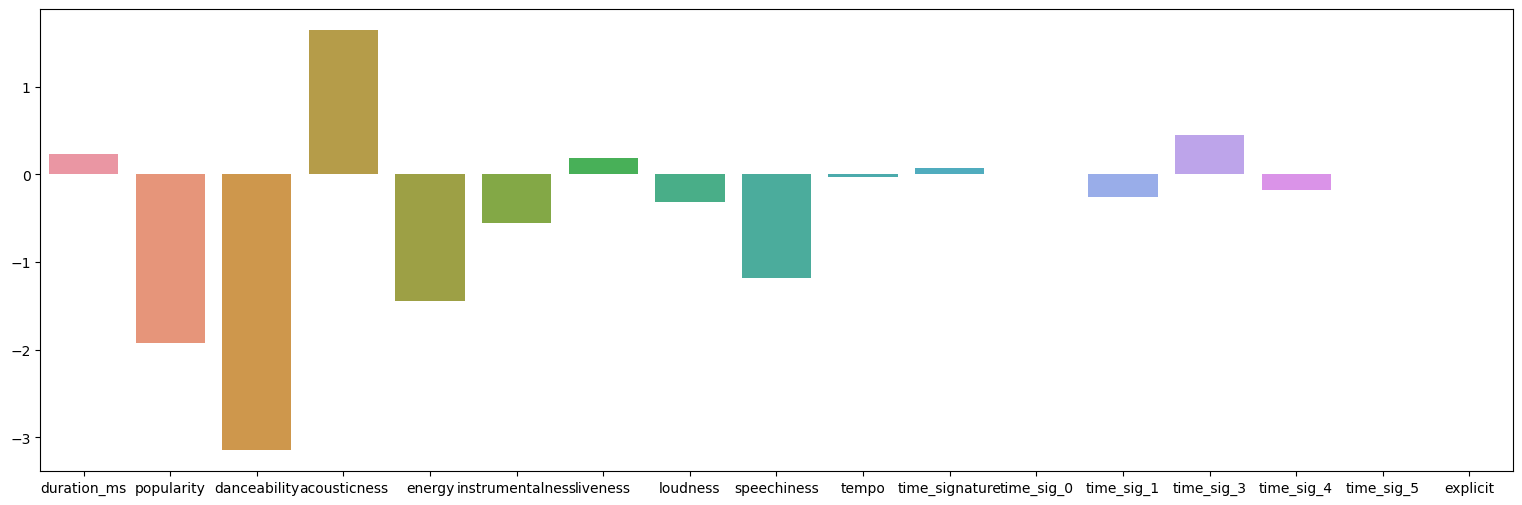

In [10]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (19, 6)


sns.barplot(x=list(load.X.columns),y=importances)


In [11]:
from qiskit.circuit.library import ZZFeatureMap

num_features = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", fold=20)



/usr/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


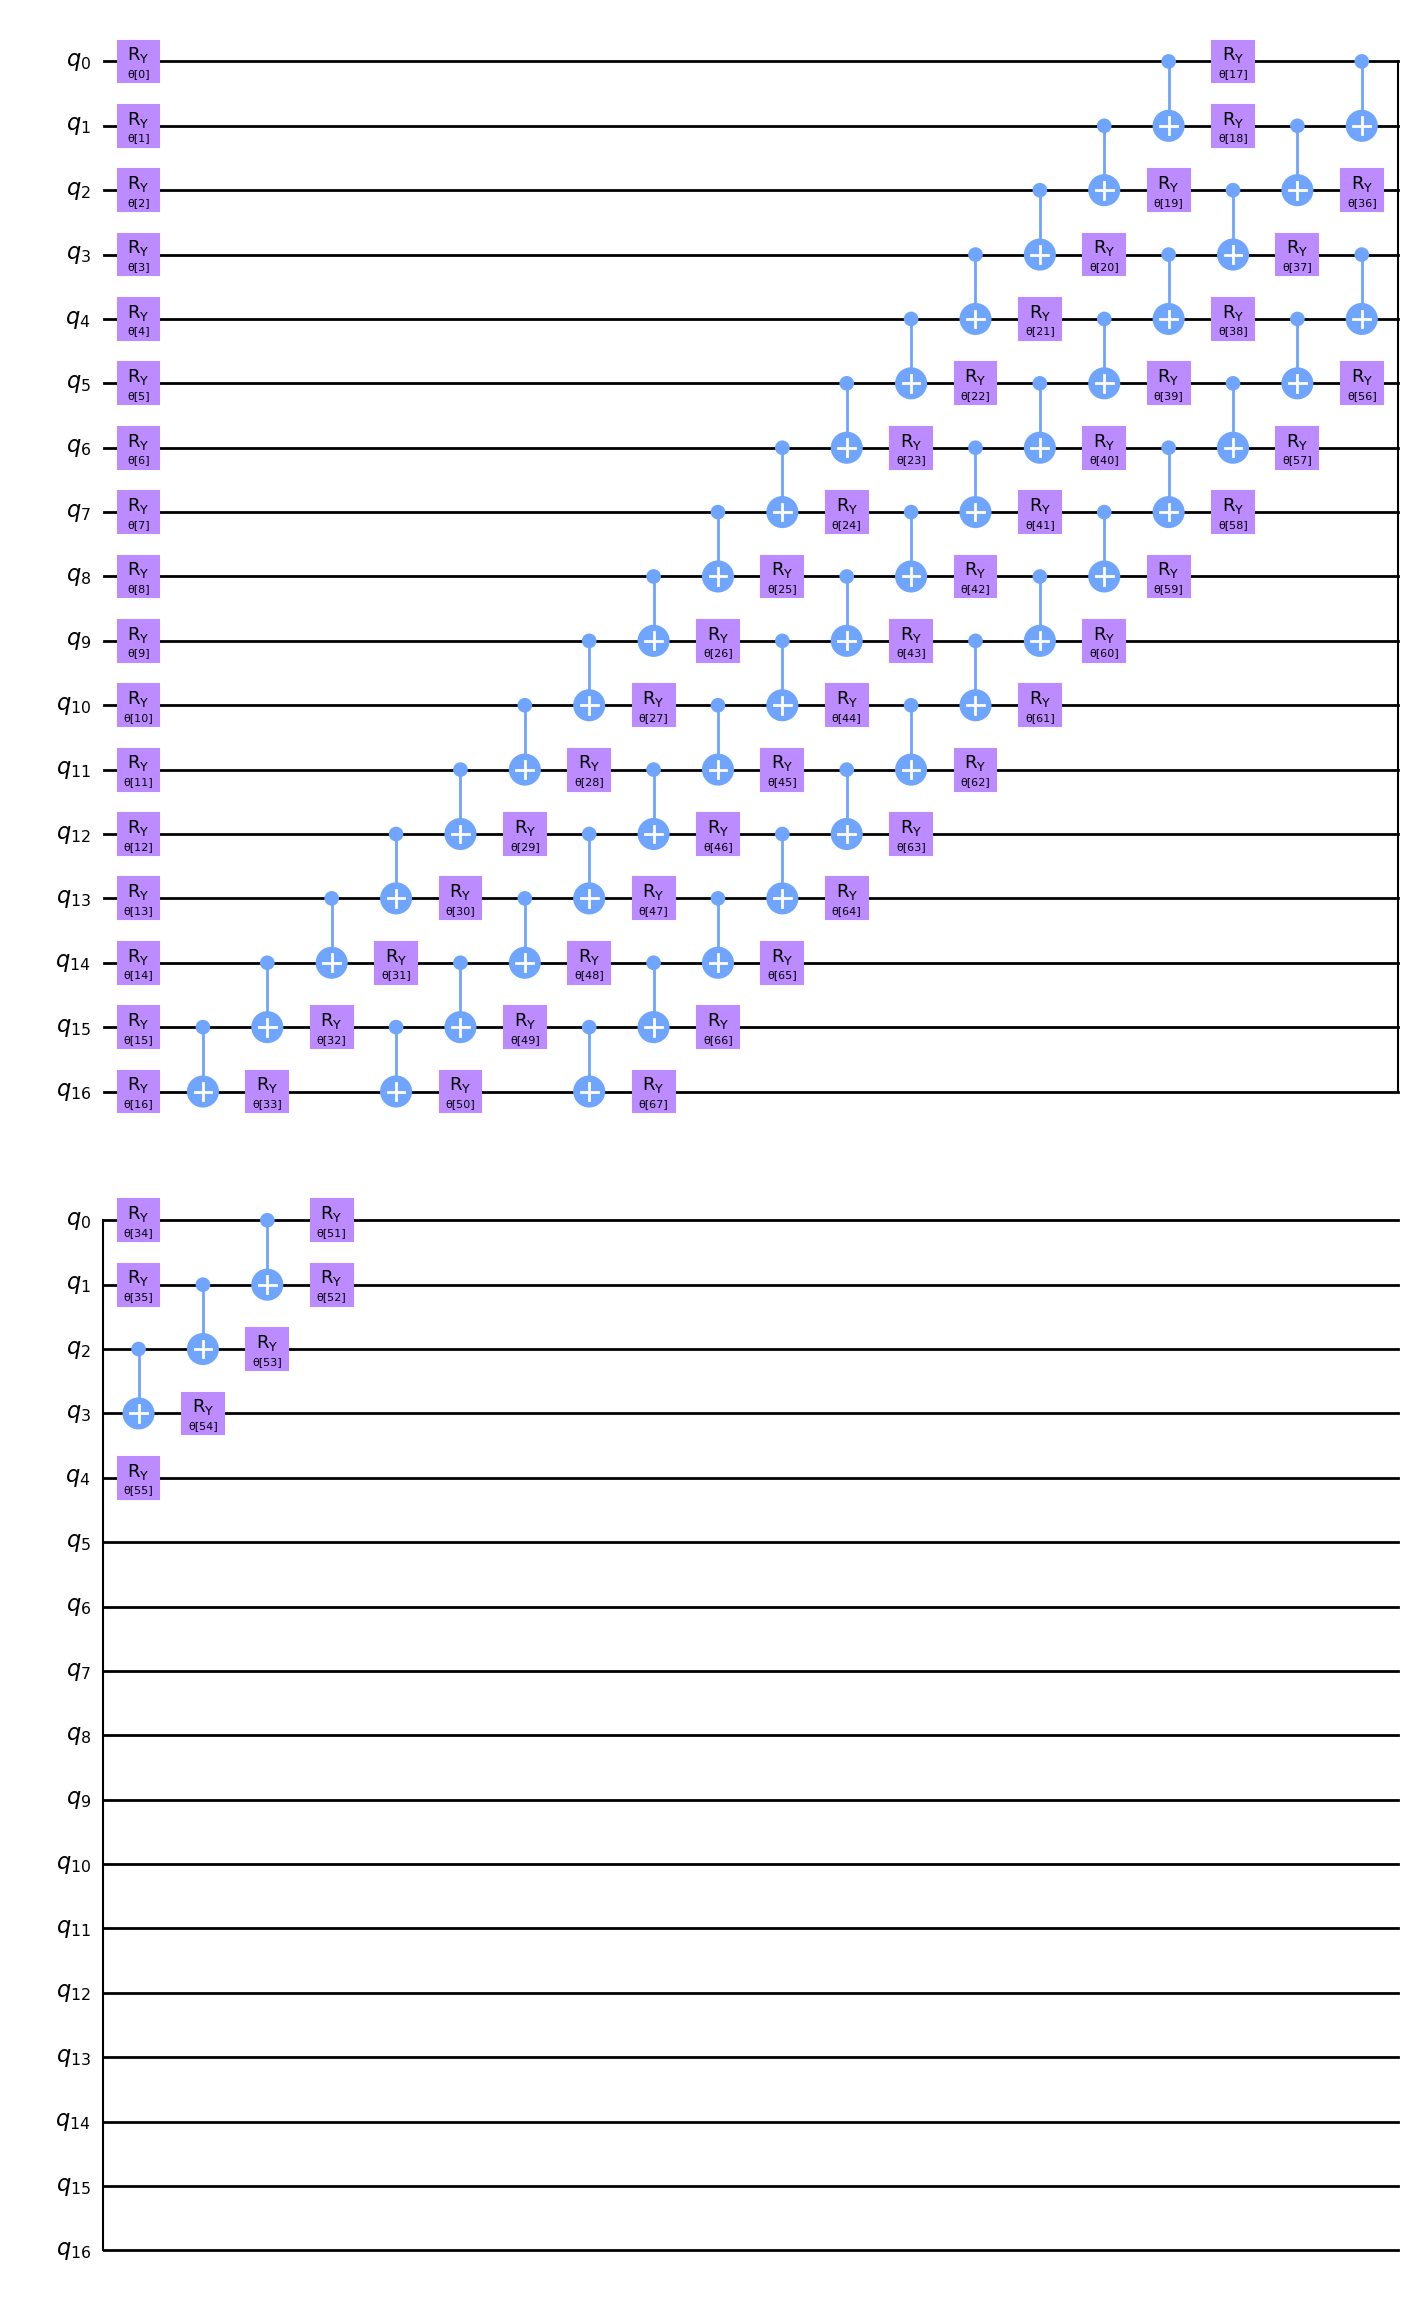

In [12]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)


In [13]:
list(load.X.columns)

['duration_ms',
 'popularity',
 'danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'time_signature',
 'time_sig_0',
 'time_sig_1',
 'time_sig_3',
 'time_sig_4',
 'time_sig_5',
 'explicit']

In [14]:
Y_train

array(['Jazz', 'House', 'House', ..., 'House', 'Classic', 'Metal'],
      dtype=object)

In [15]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [16]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [17]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()



In [18]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(X_train, Y_train)
test_score_q4 = vqc.score(X_test, Y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.39
Quantum VQC on the test dataset:     0.39


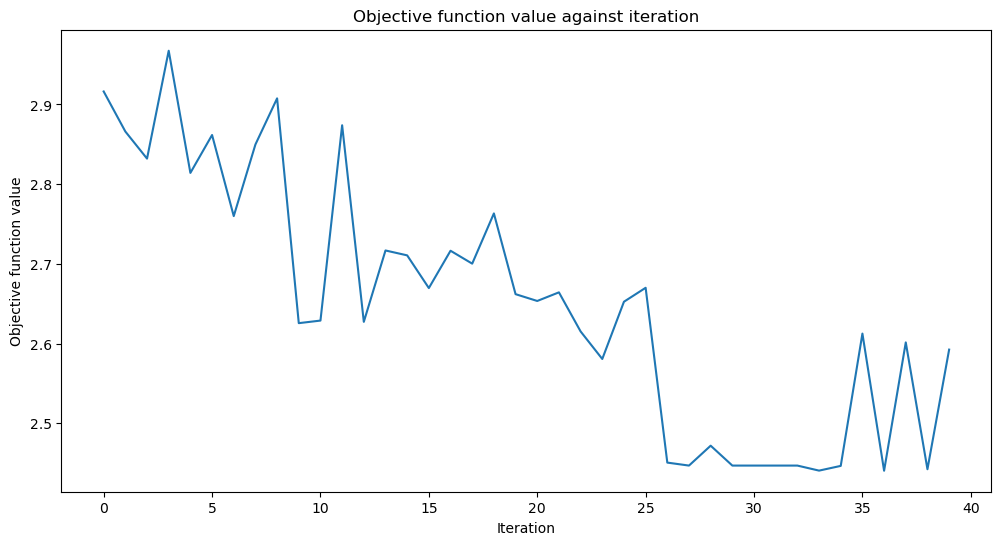

Training time: 273 seconds


In [ ]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=load.X.shape[1], reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_eff = vqc.score(X_train, Y_train)
test_score_q2_eff = vqc.score(X_test, Y_test)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.33
Quantum VQC on the test dataset using EfficientSU2:     0.32


In [6]:
import torch
import torch.nn as nn
from qiskit import QuantumCircuit as QiskitQuantumCircuit, Aer, execute
from qiskit.circuit import Parameter

class QuantumCircuit:
    """ Quantum Circuit with a single parameterized gate """
    def __init__(self, n_qubits):
        self.backend = Aer.get_backend('qasm_simulator')
        self.shots = 100
        self._circuit = QiskitQuantumCircuit(n_qubits)
        self.theta = Parameter('θ')
        self._circuit.ry(self.theta, 0)
        self._circuit.measure_all()

    def run(self, theta):
        circuit = self._circuit.bind_parameters({self.theta: theta})
        job = execute(circuit, self.backend, shots=self.shots)
        result = job.result().get_counts(circuit)
        counts = int(result.get('0' * len(circuit.qubits), 0))
        return counts / self.shots

class HybridModel(nn.Module):
    """ Hybrid quantum - classical model """
    def __init__(self):
        super(HybridModel, self).__init__()
        self.fc1 = nn.Linear(17, 8)  # Adjusted to accept 17 features
        self.fc2 = nn.Linear(8, 1)   # Intermediate layer before quantum circuit
        self.qc = QuantumCircuit(1)  # Quantum circuit with a single qubit
        self.fc3 = nn.Linear(1, 1)   # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # Assuming the quantum circuit deals with a single feature
        qc_input = x[:, :]  # Taking the first feature for the quantum circuit
        qc_output = torch.tensor([self.qc.run(i.item()) for i in qc_input]).float().view(-1, 1)
        x = self.fc3(qc_output)
        return torch.sigmoid(x)

# Instantiate the model
model = HybridModel()


In [17]:
# Example synthetic data
# X_train = torch.rand([64, 1])  # 64 samples, 1 feature each
# Y_train = torch.rand([64, 1])  # 64 target values

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Number of epochs
epochs = 350

# Training loop
for epoch in range(epochs):
    try:
        optimizer.zero_grad()  # Clear gradients from the previous step
        
        # Forward pass
        outputs = model(torch.Tensor(X_train))
        
        # Compute the loss
        loss = criterion(outputs, torch.Tensor(Y_train))
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Print statistics
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    except KeyboardInterrupt:
        break


/tmp/ipykernel_488922/3103202020.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  circuit = self._circuit.bind_parameters({self.theta: theta})


Epoch [10/150], Loss: 0.1600
Epoch [20/150], Loss: 0.1504
Epoch [30/150], Loss: 0.1447
Epoch [40/150], Loss: 0.1417
Epoch [50/150], Loss: 0.1402
Epoch [60/150], Loss: 0.1395
Epoch [70/150], Loss: 0.1392
Epoch [80/150], Loss: 0.1390
Epoch [90/150], Loss: 0.1389
Epoch [100/150], Loss: 0.1389
Epoch [110/150], Loss: 0.1389
Epoch [120/150], Loss: 0.1389
Epoch [130/150], Loss: 0.1389
Epoch [140/150], Loss: 0.1389
Epoch [150/150], Loss: 0.1389


In [ ]:
class HybridNN(Module):
    def __init__(self, qnn):
        super().__init__()
        # Classical layers
        self.clayer1 = Linear(4, 4)
        self.q_layer = TorchConnector(qnn)
        self.clayer2 = Linear(4, 1)

    def forward(self, x):
        x = torch.tanh(self.clayer1(x))
        x = self.q_layer(x)
        x = torch.sigmoid(self.clayer2(x))
        return x


In [ ]:
# Initialize the model
model = HybridNN(qnn)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_func = torch.nn.BCELoss()

# Dummy data
X = torch.randn(5, 4)
Y = torch.tensor([[1.], [0.], [1.], [1.], [0.]])

# Training loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    Y_pred = model(X)
    loss = loss_func(Y_pred, Y)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


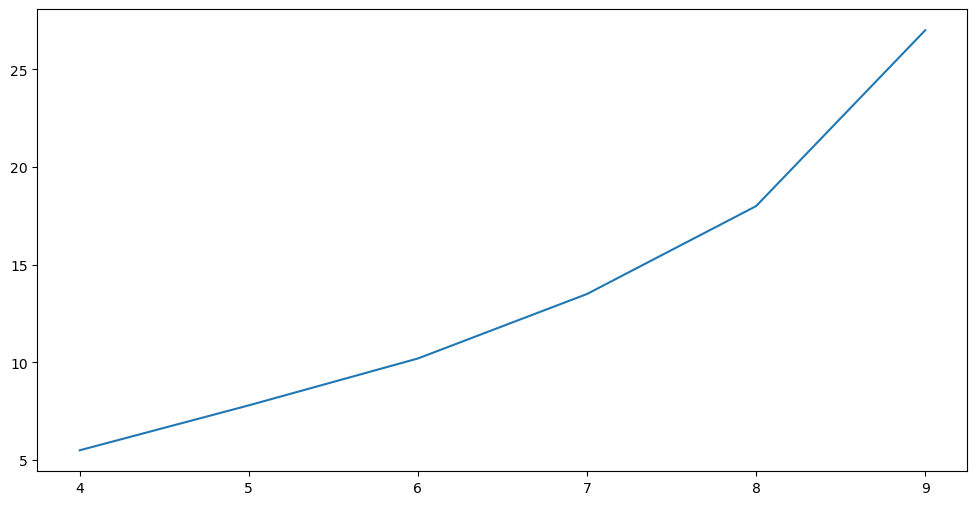

In [ ]:
x = [4,5,6,7,8,9]
y=[5.5,7.8,10.2,13.5,18.0,27.0]
plt.plot( x , y  )



In [ ]:
import numpy as np

def func(x, a, b, c):
    return a * np.exp(-b/1000 * x) + c


In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

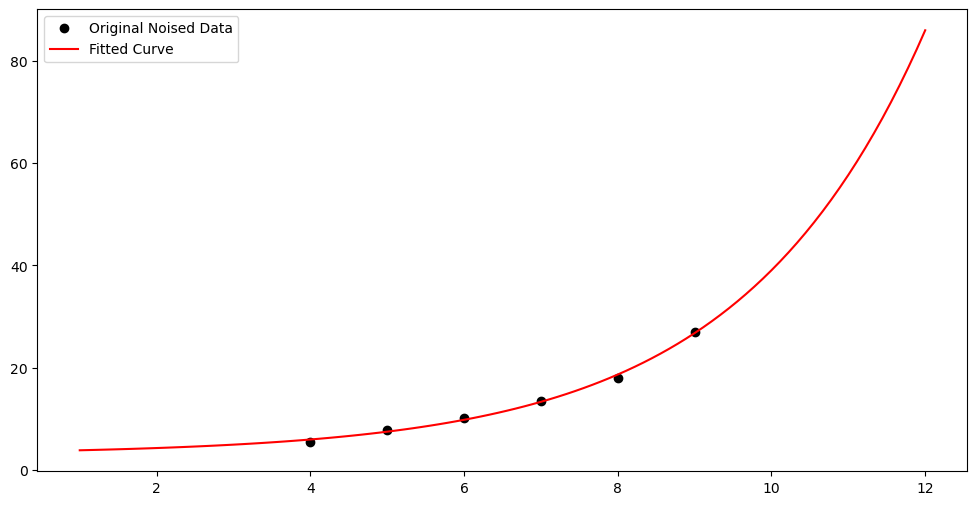

In [ ]:
plt.figure()
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(np.linspace(1,12,100), func(np.linspace(1,12,100), *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()